<a href="https://colab.research.google.com/github/Jasminewakini/WK2-IP-FINANCIAL_INCLUSIONS/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_12_Jasmine_Wakini_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial inclusion in Eastern Africa

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Determine which individuals are most likely to have or use a bank account.

### b) Defining the Metric for Success

> To predict which individuals are most likely to have or use a bank account.

> To provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.

> To provide insights into some of the key demographic factors that might drive individuals’ financial outcomes

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d) Recording the Experimental Design

1.  Reading the Data

2.  Checking the Data

3.  External Data Source Validation

4.  Tidying the Dataset

5.  Cental measures of Dispersions

6.  Exploratory Analysis

7.  Implementing the Solution

8.  Challenging the solution

9.  Follow-up questions



### e) Data Relevance

All the variables given are releveant to know the bank accounts predictions

## 2. Reading the Data

In [1]:
# Importing our libraries
# ---
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Loading the Data from the source i.e. csv
financial_df = pd.read_csv('http://bit.ly/FinancialDataset')
financial_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
financial_df.shape

(23524, 13)

In [4]:
# Previewing the top of our dataset
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each column has an appropriate datatype
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
# Checking the data set information
financial_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


The mean of the respondent age is 38 and that of the household size is 3 and their standard deviation from the mean is 16.52 and 2.28 respectively

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.


### a.Validation

According to the external data source from Financal Sector Deepening(FSD),the dataset is valid.

## 5. Tidying the Dataset

In [8]:
# Renaming columns
financial_df.rename(columns = {'Respondent Age':'Respondent_Age'}, inplace = True) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


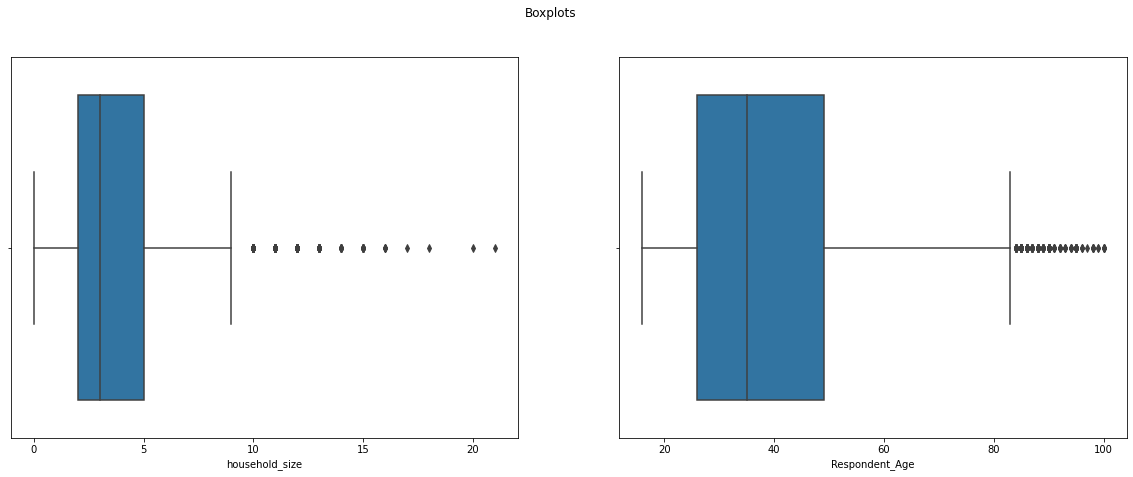

In [9]:
# Checking for outliers 
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(financial_df['household_size'], ax=ax1)
sns.boxplot(financial_df['Respondent_Age'], ax=ax2)
plt.show()

#By observation there are outliers in the data 

In [10]:
# Removing outliers based on the IQR range and stores the result in the data frame 
# ---
# 
Q1= financial_df.quantile(0.25)
Q3 = financial_df.quantile(0.75)
IQR = Q3-Q1
IQR

financal_out = financial_df[~((financial_df < (Q1 - 1.5 * IQR)) |(financial_df > (Q3 + 1.5 * IQR))).any(axis=1)]
financal_out.shape

# Printing the shape of our new dataset versus the old one 
# ---
# 
print(financal_out.shape)
print(financial_df.shape)

(22903, 13)
(23524, 13)


In [11]:
# Checking for Anomalies
#
q1_household_size = financal_out['household_size'].quantile(.25)
q3_household_size = financal_out['household_size'].quantile(.75)

iqr_size = q3_household_size - q1_household_size


q1_Respondent_Age = financal_out['Respondent_Age'].quantile(.25)
q3_Respondent_Age = financal_out['Respondent_Age'].quantile(.75)

iqr_age = q3_Respondent_Age - q1_Respondent_Age

print(iqr_size)
print(iqr_age)

3.0
22.0


In [12]:
# Identifying the Missing Data
#
financal_out.isnull().values.sum()

263

In [13]:
financal_out.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent_Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [14]:
# Dealing with the Missing Data
financal_out = financal_out.dropna()

In [15]:
# checking if they m issing values were dropped
financal_out.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent_Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [16]:
# More data cleaning procedures
financal_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   Has a Bank account      22725 non-null  object 
 4   Type of Location        22725 non-null  object 
 5   Cell Phone Access       22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   Respondent_Age          22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   The relathip with head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  Level of Educuation     22725 non-null  object 
 12  Type of Job             22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


In [17]:
#Converting the year column to datetime
#financal_out['year'] = pd.to_datetime(financal_out['year'])
financal_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   Has a Bank account      22725 non-null  object 
 4   Type of Location        22725 non-null  object 
 5   Cell Phone Access       22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   Respondent_Age          22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   The relathip with head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  Level of Educuation     22725 non-null  object 
 12  Type of Job             22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


## 6. Exploratory Analysis

### Univariate Analysis

In [18]:
# Mean
# Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. 
# In a way, it is a single number which can estimate the value of whole data set.

# Finding the mean
print(financal_out["Respondent_Age"].mean())
print(financal_out["household_size"]. mean())

38.34798679867987
3.57984598459846


In [19]:
# Median
# Median is the value which divides the data in 2 equal parts i.e. number of terms on right side of it 
# is same as number of terms on left side of it when data is arranged in either ascending or descending order.

# Finding the median
print(financal_out["Respondent_Age"].median())
print(financal_out["household_size"].median())

35.0
3.0


In [20]:
# Mode 
# Mode is the term appearing maximum time in data set i.e. term that has highest frequency.

# Finding the mode
print(financal_out["Respondent_Age"].mode())
print(financal_out["household_size"].mode())

0    30.0
dtype: float64
0    2.0
dtype: float64


In [21]:
# Standard Deviation  
# Standard deviation is the measurement of average distance between each quantity and mean. 
# That is, how data is spread out from mean

# Finding the standard deviation
financal_out.std()

year               0.846366
household_size     2.080542
Respondent_Age    15.806141
dtype: float64

In [22]:
# Variance
# Variance is a square of average distance between each values and mean. 
# That is it is square of standard deviation.

# Finding the variance
financal_out.var()

year                0.716335
household_size      4.328656
Respondent_Age    249.834101
dtype: float64

In [23]:
# Skewness
# Skewness is a measure of the asymmetry of the probability distribution 
# of a real-valued random variable about its mean

# Determining the skeweness
financal_out[['Respondent_Age','household_size']].skew()

#For skewness, if the value is greater than + 1.0,
# the distribution is right skewed. If the value is less than -1.0, the distribution is left skewed

#Right Skewed

Respondent_Age    0.740214
household_size    0.605875
dtype: float64

In [24]:
# Kurtosis
# Kurtosis is a measure of whether the data are heavy-tailed (profusion of outliers)
# or light-tailed (lack of outliers) relative to a normal distribution.

# Determining the kurtosis
financal_out[['Respondent_Age','household_size']].kurt()

# this is a platykurtic distribution

Respondent_Age   -0.237494
household_size   -0.505578
dtype: float64

In [25]:
#  Range
# Range is the difference between lowest and highest value.
# ---

# Finding the min and max values of Respondent Age
respondent_age_max = financal_out["Respondent_Age"].max()
respondent_age_min = financal_out["Respondent_Age"].min()


print(respondent_age_min)
print(respondent_age_max)
# Calculating the range
respondent_age_max -respondent_age_min

16.0
83.0


67.0

In [26]:
# Finding the min and max values of household size
household_size_max = financal_out["household_size"].max()
household_size_min = financal_out["household_size"].min()


print(household_size_min)
print(household_size_max)
# Calculating the range
household_size_max -household_size_min

0.0
9.0


9.0

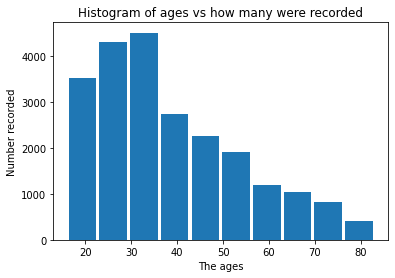

In [27]:
#Histogram of ages vs how many were recorded'
ages_responses = financal_out['Respondent_Age']
ages_responses
plt.hist(ages_responses, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('The ages')
plt.ylabel('Number recorded')
plt.title('Histogram of ages vs how many were recorded')
plt.show()

The age between 25 - 35 were the highest recorded.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

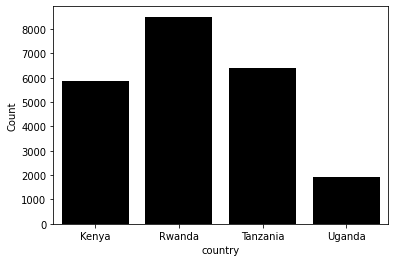

In [28]:
#Which country was recorded most
sns.countplot(financal_out.country, color='black',saturation=0.7)
plt.xlabel('country')
plt.ylabel('Count')

Rwanda recorded the most data

Text(0.5, 1.0, 'Countries Ranking on Bank Access')

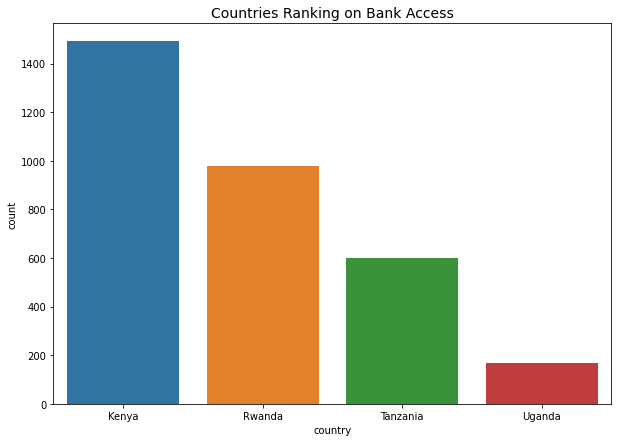

In [29]:
#Finding country with the highest access to bank accounts
#Step 1. locationg from the dataset population with bank accountries 
bank= financal_out.loc[(financal_out['Has a Bank account'] == 'Yes')]

#step 2.PLotting a bar graph from the dataset 
plt.figure(figsize=(10,7))
sns.countplot(x='country', data=bank )
plt.title("Countries Ranking on Bank Access" , fontsize =14)

Kenya is the country with the highest access to banks

In [30]:
gender_acc = financal_out.loc[financal_out['Has a Bank account']== 'Yes'].groupby('gender_of_respondent')['Has a Bank account'].value_counts()
gender_acc

gender_of_respondent  Has a Bank account
Female                Yes                   1453
Male                  Yes                   1782
Name: Has a Bank account, dtype: int64

Males recorded the highest number with bank account access

In [31]:
# Distribution of the marital_status in the data 
financal_out['marital_status'].value_counts()

Married/Living together    10431
Single/Never Married        7748
Widowed                     2509
Divorced/Seperated          2029
Dont know                      8
Name: marital_status, dtype: int64

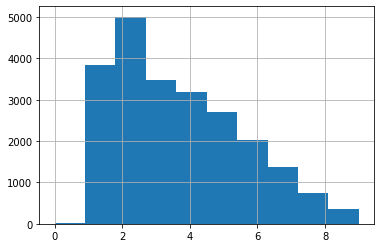

In [32]:
# Histogram of household size
financal_out['household_size'].hist()

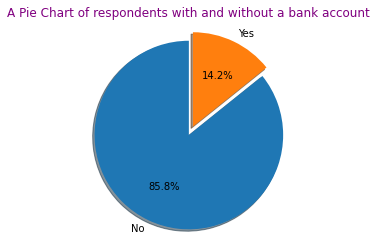

In [33]:
# A pie chart of the respondents who had/ had no bank account

# Group  data to be plotted
account = financal_out['Has a Bank account'].value_counts()
account

# Access the data to plot

# labels
sizes= account.index
sizes

# values
data = account.values
data

# Plot the pie chart

plt.pie(data, labels = sizes, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account', color = 'purple')
plt.show()

The percentage of people with no bank accounts is higher

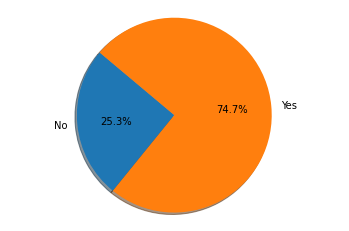

In [34]:
#Do the respondents have more cell_phone access

finances = financal_out[['country','Cell Phone Access']]
new_df = finances.groupby('Cell Phone Access')['country'].count()
new_df =pd.DataFrame({'Cell Phone Access':new_df.index, 'country':new_df.values})
new_df
country= new_df['country']
bank_account= new_df['Cell Phone Access']
plt.pie(country, labels=bank_account, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

For the countries we can see that theres a higher number of peopple with cell phone access

### Bivariates Analysis

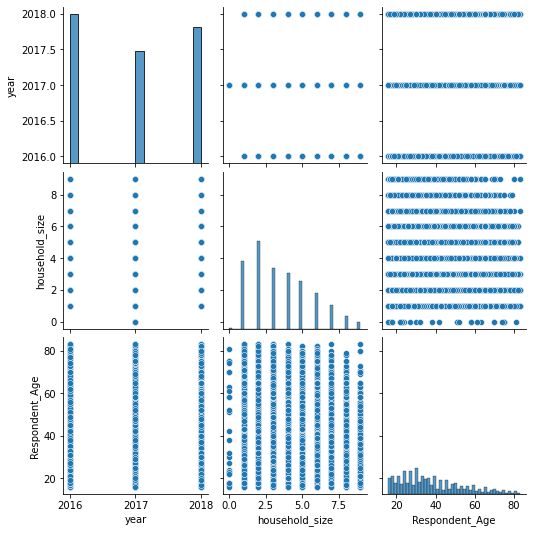

In [35]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(financal_out)
plt.show()

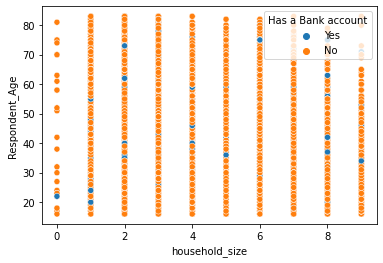

In [36]:
# Plot a scatter plot to show the relationship

sns.scatterplot(x='household_size', y= 'Respondent_Age', hue = 'Has a Bank account', data = financal_out)

In [37]:
# calculating the correlation coefficient

coeff =financal_out['Respondent_Age'].corr(financal_out['household_size']) 
print(coeff)

-0.1062088216975987


There is strong negative correlation between household size and respondent age

In [38]:
#grouping ages by the type of job
job_type= financal_out.groupby(['Type of Job'], as_index=False)['Respondent_Age'].mean().sort_values(by='Respondent_Age',ascending=False)
job_type

,Type of Job,Respondent_Age
4,Government Dependent,62.306220
1,Farming and Fishing,43.108761
9,Self employed,38.597842
2,Formally employed Government,38.094241
7,Other Income,37.361598
0,Dont Know/Refuse to answer,37.254237
5,Informally employed,36.090528
8,Remittance Dependent,34.373895
3,Formally employed Private,34.012560
6,No Income,31.143590


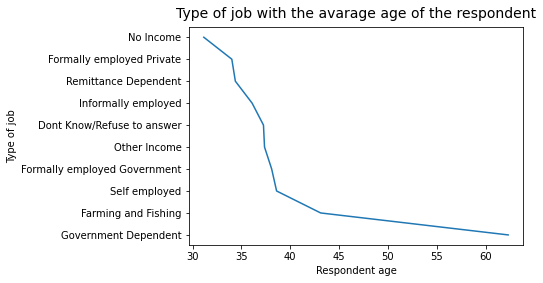

In [39]:
# Plotting a line graph
job= job_type['Type of Job']
respondent = job_type['Respondent_Age']

plt.plot(respondent, job)
plt.title("Type of job with the avarage age of the respondent", fontsize=14, y=1.015)
plt.ylabel('Type of job')
plt.xlabel('Respondent age')
plt.show()

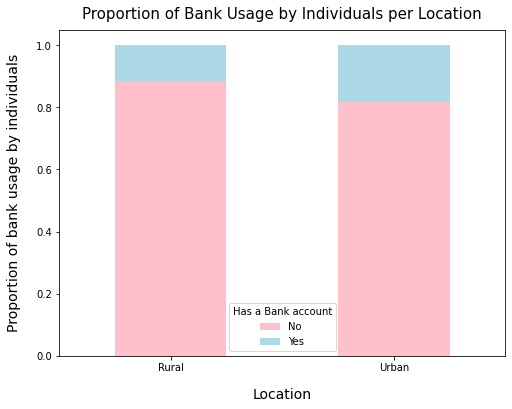

In [48]:
# Grouping proportion of bank usage by individuals per location
location=financal_out.groupby('Type of Location')['Has a Bank account'].value_counts(normalize=True).unstack()

# Specifying the colors of the stacked columns
colors= ['pink', 'lightblue']
# Plotting the chart
location.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
# Giving the chart a title
plt.title('Proportion of Bank Usage by Individuals per Location', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Location', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Proportion of bank usage by individuals', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

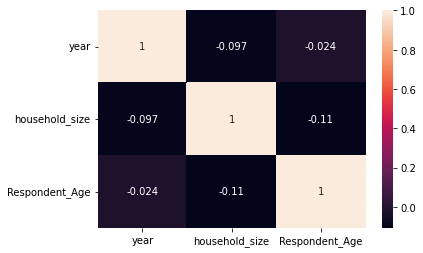

In [41]:
sns.heatmap(financal_out.corr(),annot=True)
plt.show()

In [42]:
#Showing descriptive statistics from researchpy.summary_cont()
# --- 
!pip install researchpy
import researchpy as rp


rp.summary_cont(financal_out.groupby("Has a Bank account")['Respondent_Age'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,N,Mean,SD,SE,95% Conf.,Interval
Has a Bank account,,,,,,
No,19490,38.1830,16.0889,0.1152,37.9571,38.4089
Yes,3235,39.3422,13.9430,0.2451,38.8615,39.8228


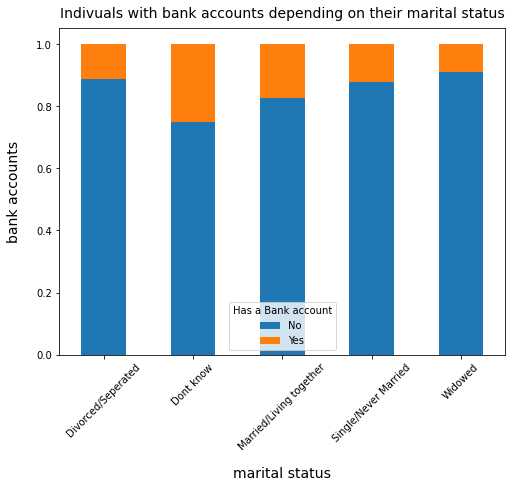

In [43]:
# plotting a stacked bar chart of marital status and has a bank account
maritalstatus = financal_out.groupby('marital_status')['Has a Bank account'].value_counts(normalize=True).unstack()
maritalstatus.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Indivuals with bank accounts depending on their marital status', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('bank accounts', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('marital status', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

In [45]:
# computing the zscore

from scipy import stats
print("Household_size zscore" ,stats.zscore(financal_out['household_size']))
print("Respondent_Age zscore" ,stats.zscore(financal_out['Respondent_Age']))

Household_size zscore [-0.2787056   0.68260346  0.68260346 ... -0.75936013  0.68260346
  1.64391252]
Respondent_Age zscore [-0.90776757  2.00255768 -0.78123169 ... -0.71796375 -0.71796375
 -0.52815993]


In [46]:
#Computing ttest 

from scipy.stats import ttest_1samp

x = financal_out['household_size']
expected_mean = 0

tx_statistic, p_value = ttest_1samp(x, expected_mean, axis = 0)
print('Household_size t-test is ',tx_statistic)


y = financal_out['Respondent_Age']
expected_mean = 0

ty_statistic, p_value = ttest_1samp(y, expected_mean, axis = 0)

print('Respondent Age t-test is ',ty_statistic)

Household_size t-test is  259.38196290001486
Respondent Age t-test is  365.7367962894159


In [47]:
# computing ttest for two independent samples

from scipy.stats import ttest_ind

x = financal_out['household_size']
y = financal_out['Respondent_Age']

# Then calculating the t-test
t_statistic, p_value = ttest_ind(x, y)

# Then displaying the t-statistic
t_statistic

-328.75885367260025

### Multivariate Analysis

Principal Component Analysis

In [ ]:
# we'll first make a copy of our dataframe on which we'll perform the the test on

financal_out = financal_out.copy()
financal_out.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,0,2,Yes,0,1,3.0,24.0,0,2,4,9
1,0,2,No,0,0,5.0,70.0,0,4,1,4
2,0,2,Yes,1,1,5.0,26.0,1,3,6,9
3,0,2,No,0,1,5.0,34.0,0,2,3,3
4,0,2,No,1,0,8.0,26.0,1,3,3,5


In [ ]:
# drop unnecessary columns

#financal_out.drop(['uniqueid'], axis=1, inplace=True)
#financal_out.drop(['The relathip with head'], axis=1, inplace=True)
financal_out.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,0,2,Yes,0,1,3.0,24.0,0,2,4,9
1,0,2,No,0,0,5.0,70.0,0,4,1,4
2,0,2,Yes,1,1,5.0,26.0,1,3,6,9
3,0,2,No,0,1,5.0,34.0,0,2,3,3
4,0,2,No,1,0,8.0,26.0,1,3,3,5


In [ ]:
# we then import label encoder to convert our categorical data into numbers 
# that our predictive models can better understand

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

financal_out['country']=lb.fit_transform(financal_out['country'].astype(str))
financal_out['year']=lb.fit_transform(financal_out['year'].astype(str))
financal_out['Type of Location']=lb.fit_transform(financal_out['Type of Location'].astype(str))
financal_out['Cell Phone Access']=lb.fit_transform(financal_out['Cell Phone Access'].astype(str))
financal_out['gender_of_respondent']=lb.fit_transform(financal_out['gender_of_respondent'].astype(str))
financal_out['marital_status']=lb.fit_transform(financal_out['marital_status'].astype(str))
financal_out['Level of Educuation']=lb.fit_transform(financal_out['Level of Educuation'].astype(str))
financal_out['Type of Job']=lb.fit_transform(financal_out['Type of Job'].astype(str))

financal_out.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,0,2,Yes,0,1,3.0,24.0,0,2,4,9
1,0,2,No,0,0,5.0,70.0,0,4,1,4
2,0,2,Yes,1,1,5.0,26.0,1,3,6,9
3,0,2,No,0,1,5.0,34.0,0,2,3,3
4,0,2,No,1,0,8.0,26.0,1,3,3,5


In [ ]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = financal_out.drop('Has a Bank account', 1)
y = financal_out['Has a Bank account']
print(X)
print(y)

       country  year  ...  Level of Educuation  Type of Job
0            0     2  ...                    4            9
1            0     2  ...                    1            4
2            0     2  ...                    6            9
3            0     2  ...                    3            3
4            0     2  ...                    3            5
...        ...   ...  ...                  ...          ...
23512        3     2  ...                    1            7
23519        3     2  ...                    1            7
23520        3     2  ...                    4            7
23521        3     2  ...                    3            7
23522        3     2  ...                    4            9

[22725 rows x 10 columns]
0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23512     No
23519     No
23520     No
23521     No
23522     No
Name: Has a Bank account, Length: 22725, dtype: object


In [ ]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 

#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(       country  year  ...  Level of Educuation  Type of Job
 20265        2     1  ...                    3            9
 20845        2     1  ...                    3            9
 21432        3     2  ...                    1            9
 12659        1     0  ...                    3            5
 16087        2     1  ...                    5            3
 ...        ...   ...  ...                  ...          ...
 13500        1     0  ...                    1            5
 20232        2     1  ...                    1            8
 10127        1     0  ...                    5            2
 11097        1     0  ...                    3            5
 2834         0     2  ...                    6            1
 
 [18180 rows x 10 columns],
        country  year  ...  Level of Educuation  Type of Job
 7808         1     0  ...                    1            1
 10042        1     0  ...                    4            1
 18864        2     1  ...                    1        

In [ ]:
financal_out.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,0,2,Yes,0,1,3.0,24.0,0,2,4,9
1,0,2,No,0,0,5.0,70.0,0,4,1,4
2,0,2,Yes,1,1,5.0,26.0,1,3,6,9
3,0,2,No,0,1,5.0,34.0,0,2,3,3
4,0,2,No,1,0,8.0,26.0,1,3,3,5


In [ ]:
# Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.87642222  0.03595449  1.24246716 ...  0.61870581 -0.00733443
   1.15881153]
 [ 0.87642222  0.03595449  1.24246716 ...  0.61870581 -0.00733443
   1.15881153]
 [ 1.96536126  1.21796661 -0.80485025 ... -0.38675335 -1.67408413
   1.15881153]
 ...
 [-0.21251682 -1.14605762  1.24246716 ... -0.38675335  1.65941526
  -1.10446167]
 [-0.21251682 -1.14605762 -0.80485025 ...  0.61870581 -0.00733443
  -0.13448744]
 [-1.30145585  1.21796661 -0.80485025 ... -0.38675335  2.49279011
  -1.42778641]]
[[-0.21251682 -1.14605762 -0.80485025 ... -0.38675335 -1.67408413
  -1.42778641]
 [-0.21251682 -1.14605762 -0.80485025 ... -0.38675335  0.82604042
  -1.42778641]
 [ 0.87642222  0.03595449  1.24246716 ... -0.38675335 -1.67408413
   1.15881153]
 ...
 [-0.21251682 -1.14605762 -0.80485025 ...  0.61870581  0.82604042
  -1.42778641]
 [-0.21251682 -1.14605762 -0.80485025 ... -0.38675335 -1.67408413
  -0.13448744]
 [-1.30145585  1.21796661 -0.80485025 ... -0.38675335 -0.00733443
  -1.42778641]]


In [ ]:
# Applying PCA 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train)
print(X_test)

[[ 2.46273013  0.61754003 -0.68407027 ...  0.27268941  0.13309576
  -0.16225298]
 [ 2.67494398  0.47879827 -0.76490023 ...  0.15965976 -0.22387828
  -0.10342837]
 [ 0.76408763  1.51163747 -1.68917676 ... -0.64467984  0.64070514
   0.70824357]
 ...
 [-1.07848307 -1.07118423  0.43913522 ...  1.35591143  2.012241
  -0.12746142]
 [-0.45003473  0.19719644 -1.09444622 ... -0.37369187 -0.6686961
  -0.41807234]
 [-1.87655541 -2.79650247  1.31948352 ... -0.92079167  0.81603044
   0.33399597]]
[[-2.24825444  0.91710091 -1.1924494  ...  0.81946281 -0.65491482
   0.78020984]
 [-2.06314948 -0.66874009 -0.28858559 ... -0.10248818  0.62759003
   0.05753377]
 [ 1.93449239  2.34490177 -0.36089612 ...  0.96839414  0.64921703
  -0.3303765 ]
 ...
 [-1.48473312 -0.80845749 -0.29878706 ... -0.49416022 -0.43494929
   0.39258652]
 [-0.92903118  1.38474627 -1.21373762 ...  0.36337665 -0.7248055
  -0.3417941 ]
 [-2.63025001 -1.17198143  1.02048605 ...  0.14973343  0.13854924
   0.94506004]]


In [ ]:
# Explained variance ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.20007479, 0.16435529, 0.1161649 , 0.10463609, 0.09486205,
       0.07922533, 0.07496356, 0.06577601, 0.05529525, 0.04464673])

In [ ]:
# using one principal component to train our algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_test)
print(X_train)

[[-2.24825444]
 [-2.06314948]
 [ 1.93449239]
 ...
 [-1.48473312]
 [-0.92903118]
 [-2.63025001]]
[[ 2.46273013]
 [ 2.67494398]
 [ 0.76408763]
 ...
 [-1.07848307]
 [-0.45003473]
 [-1.87655541]]


In [ ]:
# Training and Making Predictions using random forest classification
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting from the output that with only one feature, 
# the random forest algorithm is able to correctly predict at an accuracy of 85.72%.

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


In [ ]:
# finding results with the full feature set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# predicting the results

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


Principal Component Analysis gives an 85.72% accuracy which is quite high making it a good method to conduct multivariate analysis

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 
financal_out['Has a Bank account']=lb.fit_transform(financal_out['Has a Bank account'].astype(str))

In [ ]:
all_df = financal_out[['Has a Bank account', 'Type of Location', 'country', 'Cell Phone Access', 'gender_of_respondent', 'marital_status', 'Type of Job']] 

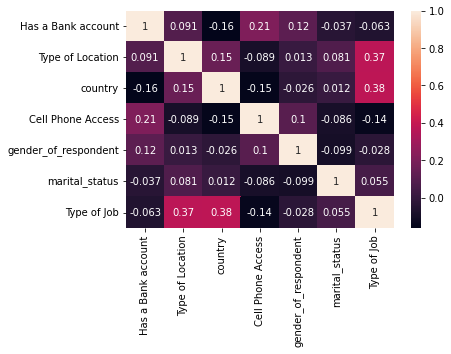

In [ ]:
sns.heatmap(all_df.corr(),annot=True)
plt.show()

None of the variables have any relationship with opening and closing a bank account as they are not correlated 1

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. 

Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 

A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all light purple because those squares are correlating each variable to itself (so it's a perfect correlation). 

For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

## 8. Challenging the solution

Linear Discriminant Analysis

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
# first step is to divide the dataset into features and corresponding labels
# then divide the resultant dataset into training and test sets. 
#

A = financal_out.drop('Has a Bank account', 1)
b = financal_out['Has a Bank account']
print(A)
print(b)

       country  year  ...  Level of Educuation  Type of Job
0            0     2  ...                    4            9
1            0     2  ...                    1            4
2            0     2  ...                    6            9
3            0     2  ...                    3            3
4            0     2  ...                    3            5
...        ...   ...  ...                  ...          ...
23512        3     2  ...                    1            7
23519        3     2  ...                    1            7
23520        3     2  ...                    4            7
23521        3     2  ...                    3            7
23522        3     2  ...                    4            9

[22725 rows x 10 columns]
0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23512     No
23519     No
23520     No
23521     No
23522     No
Name: Has a Bank account, Length: 22725, dtype: object


In [ ]:
# dividing the dataset into training and test sets

from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

(       country  year  ...  Level of Educuation  Type of Job
 20265        2     1  ...                    3            9
 20845        2     1  ...                    3            9
 21432        3     2  ...                    1            9
 12659        1     0  ...                    3            5
 16087        2     1  ...                    5            3
 ...        ...   ...  ...                  ...          ...
 13500        1     0  ...                    1            5
 20232        2     1  ...                    1            8
 10127        1     0  ...                    5            2
 11097        1     0  ...                    3            5
 2834         0     2  ...                    6            1
 
 [18180 rows x 10 columns],
        country  year  ...  Level of Educuation  Type of Job
 7808         1     0  ...                    1            1
 10042        1     0  ...                    4            1
 18864        2     1  ...                    1        

In [ ]:
# Feature scaling
#
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)
A_train
A_test


array([[-0.21251682, -1.14605762, -0.80485025, ..., -0.38675335,
        -1.67408413, -1.42778641],
       [-0.21251682, -1.14605762, -0.80485025, ..., -0.38675335,
         0.82604042, -1.42778641],
       [ 0.87642222,  0.03595449,  1.24246716, ..., -0.38675335,
        -1.67408413,  1.15881153],
       ...,
       [-0.21251682, -1.14605762, -0.80485025, ...,  0.61870581,
         0.82604042, -1.42778641],
       [-0.21251682, -1.14605762, -0.80485025, ..., -0.38675335,
        -1.67408413, -0.13448744],
       [-1.30145585,  1.21796661, -0.80485025, ..., -0.38675335,
        -0.00733443, -1.42778641]])

In [ ]:
# Peforming LDA
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)
A_train
A_test

array([[-1.60525079],
       [ 0.91425307],
       [-1.50876763],
       ...,
       [ 0.50404327],
       [-2.11362957],
       [ 0.66555589]])

In [ ]:
# Step 7: Training and Making Predictions using the random forest classifier 
# to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)
b_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# Evaluating the Performance of the algorithm 
# To find the accuracy of the prediction, we'll use a confusion matrix
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(b_test, b_pred)
print(cm)
print('Accuracy' + str(accuracy_score(b_test, b_pred)))

[[3790  106]
 [ 466  183]]
Accuracy0.8741474147414742


Linear Discriminant Analysis gives an 87.41% accuracy which is quite high making it a good method to conduct multivariate analysis


Principal Component Analysis and Linear Discriminant Analysis gave accuracy levels of 85.72% and 87.41%, respectively. This shows there's still room for improvement in terms of the accuracy score.

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes we had the correct data that was sufficient enough to perform our needed analysis

### b). Do we need other data to answer our question?

No we do not need any other data because the one we had was able to give us insight that led to answering our questions

### c). Did we have the right question?

Yes, the answers to our question provided an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.